In [151]:
#Importing the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [152]:
#Reading the CSV 
df = pd.read_csv('BankChurners.csv')

In [153]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

We have 22 features, which we will use to classify 'Attrition_Flag' at the end

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

We have many categories which are not in a int or float format. We will convert these features in Label Encoding phase.

In [155]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

There are no null values

In [156]:
df.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

Some data like Education_Level and Income_Category are discrete variables, while Credit_Limit and Avg_Open_To_Buy are somewhat continuous valeues, with a lot of unique values

In [157]:
# Columns to be dropped
drop_columns = ['CLIENTNUM',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

# Remove CLIENTNUM and the Naive_Bayes_Classifiers
df = df.drop(drop_columns,axis=1)

In [158]:
df

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

Removed the three unnecessary features from the dataframe, as they are redundant.

### Exploratory Data Analysis

In [159]:
#Creating a list of features
list_of_feat = []
for items in df:
    list_of_feat.append(items)

In [160]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}



<IPython.core.display.Javascript object>

Javascript to not create graphs within a scrollbar

### Pie Charts

In [161]:
#Creating Bar Graphs with features having less than 30 unique values
for i in list_of_feat:
    #Check the threshold
    if(df[i].nunique() >= 30):
        continue
    else:
        #Using plotly pie chart
        fig = px.pie(names=df[i],title=i)
        fig.show() 

Attrition_Flag : Highly skewed Data - And this may cause a problem. Algorithms may just predict Existing Customer and still get high accuracy. Hence, we use SMOTE to get balanced data.

Credit_Category : Almost all customers opted for the Blue card, and the number of customers decreases as the card quality increases.

Gender: There are slightly more females then males, but nothing special is happening there.
    
Income_Category: There is representation from all forms of income - but most people belong to the less than $40K 
    
Education: People of all education levels are holding some bank cards.

Inactivity: Most people have been inactive for 3 to 4 months. None of the customers have been inactive for more than 6 months.

### Histogram Charts

In [162]:
#Creating a histplot for any feature which has more than 10 unique values
for i in list_of_feat:
    #Setting the threshold
    if(df[i].nunique() <= 10):
        continue
    else:
        fig = px.histogram(df, x=df[i],title=i)
        fig.show()

As you can see, most variables do not have a normal curve and are highly skewed. However, we will only be using ensemble approaches, hence outliers and skewness doesn't matter much.

Some intresting notes:

Age Curve is very normal, as expected.

Most people have a revolving balance of 0.

Credit limit for a large number of people is within $0 - $5k

Average Utilization Ratio also spikes at 0

## Bivariate Analysis

Now we will look at how data works with respect to each other. Our main focus will be with attrition.

In [163]:
#List of all features
list_of_feat

['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [164]:
fig = px.histogram(df, x=df['Attrition_Flag'],color=df['Gender'])
fig.show()

Attrition does not seem to be a Gender related issue - As both Males and Females have fair behaviour

In [165]:
fig = px.histogram(df, x=df['Education_Level'],color=df['Attrition_Flag'])
fig.show()

Again, education has no significant effect on Attritions

In [166]:
fig = px.histogram(df, x=df['Income_Category'],color=df['Attrition_Flag'])
fig.show()

All Attrition is within 15-20% for all income categories. Hence, no income level has a drastic effect on Attrition

In [167]:
fig = px.histogram(df, x=df['Income_Category'],color=df['Card_Category'])
fig.show()

The amount of people with Platinum Cards is not increasing with the Income level - However, the "unknown" category may have higher income who have the highest Platinum count. Majority of the people in all of the income groups prefer the Blue card over others

In [168]:
fig = px.histogram(df, x=df['Card_Category'],color=df['Attrition_Flag'],title='Churning vs Card')
fig.show()

When the ratio of Customer status is taken for all cards, ~ 1:5 of customers have attrited for all types of cards.

In [169]:
fig = px.histogram(df, x=df['Card_Category'],color=df['Gender'],title='Churning vs Card')
fig.show()

Majority of the women and men prefer Blue Card, but others cards are somewhat more popular among men.

In [170]:
fig = px.histogram(df, x=df['Months_on_book'],color=df['Gender'],title='No. of months vs Gender')
fig.show()

A reletively normal distribution of male and females

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

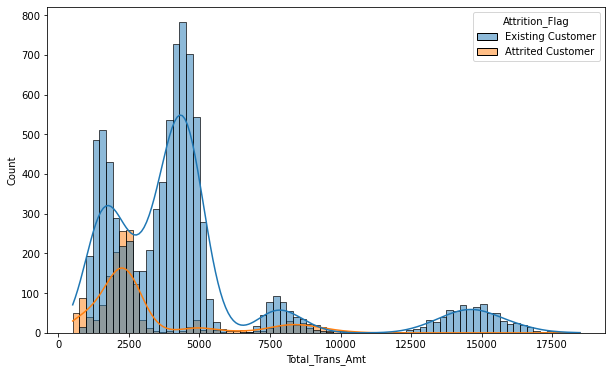

In [171]:
plt.figure(figsize=(10,6))
sns.histplot(x='Total_Trans_Amt',hue='Attrition_Flag',data=df,kde=True)

In [172]:
df[df['Attrition_Flag']=='Attritied Customer'].max()

Attrition_Flag             NaN
Customer_Age               NaN
Gender                     NaN
Dependent_count            NaN
Education_Level            NaN
Marital_Status             NaN
Income_Category            NaN
Card_Category              NaN
Months_on_book             NaN
Total_Relationship_Count   NaN
Months_Inactive_12_mon     NaN
Contacts_Count_12_mon      NaN
Credit_Limit               NaN
Total_Revolving_Bal        NaN
Avg_Open_To_Buy            NaN
Total_Amt_Chng_Q4_Q1       NaN
Total_Trans_Amt            NaN
Total_Trans_Ct             NaN
Total_Ct_Chng_Q4_Q1        NaN
Avg_Utilization_Ratio      NaN
dtype: float64

The maximum transaction amount for Attritited Customers are 10,583. While it is way larger for existing customers. However, majority of people in Attrited and Existing customers have similar Transaction Amount

In [173]:
fig = px.histogram(df, x=df['Months_Inactive_12_mon'],color=df['Attrition_Flag'],title='No. of months inactive vs Attrition')
fig.show()


There are no special patterns in Inactivity. Both type of customers are inactive for many months.

In [174]:
fig = px.histogram(df, x=df['Avg_Utilization_Ratio'],color=df['Attrition_Flag'],title='Average Utilization Ratio vs Attrition')
fig.show()

Again, no special patterns are observed in the following observations

---------------------------------------------------------------------------------------------------------------------------
In all, we can see that there are small but understandable diffrences in the customers, with some diffrences almost in fixed ratios. This can help us better understand how predictive algorithms will work the differences

### Predictive Analysis

##### Label Encoding relevant variables

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [176]:
#Finding all the data that is not in a number format
unlabelled_data = []
for items in df:
    if df[items].dtype!='int64' and df[items].dtype!='float64' :
        print(items)
        unlabelled_data.append(items)
unlabelled_data

Attrition_Flag
Gender
Education_Level
Marital_Status
Income_Category
Card_Category


['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [177]:
#Importing Label Encoder
from sklearn import preprocessing
#Encoding all unlabelled data
for item in unlabelled_data:
    label_encoder = preprocessing.LabelEncoder()
    df[item]= label_encoder.fit_transform(df[item])

In [178]:
#Checking the success of encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  int32  
 6   Income_Category           10127 non-null  int32  
 7   Card_Category             10127 non-null  int32  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [179]:
df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               1            45       1                3                3   
1               1            49       0                5                2   
2               1            51       1                3                2   
3               1            40       0                4                3   
4               1            40       1                3                5   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               1                2              0              39   
1               2                4              0              44   
2               1                3              0              36   
3               3                4              0              34   
4               1                2              0              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

### Creating HeatMap and Feature Importance

<AxesSubplot:>

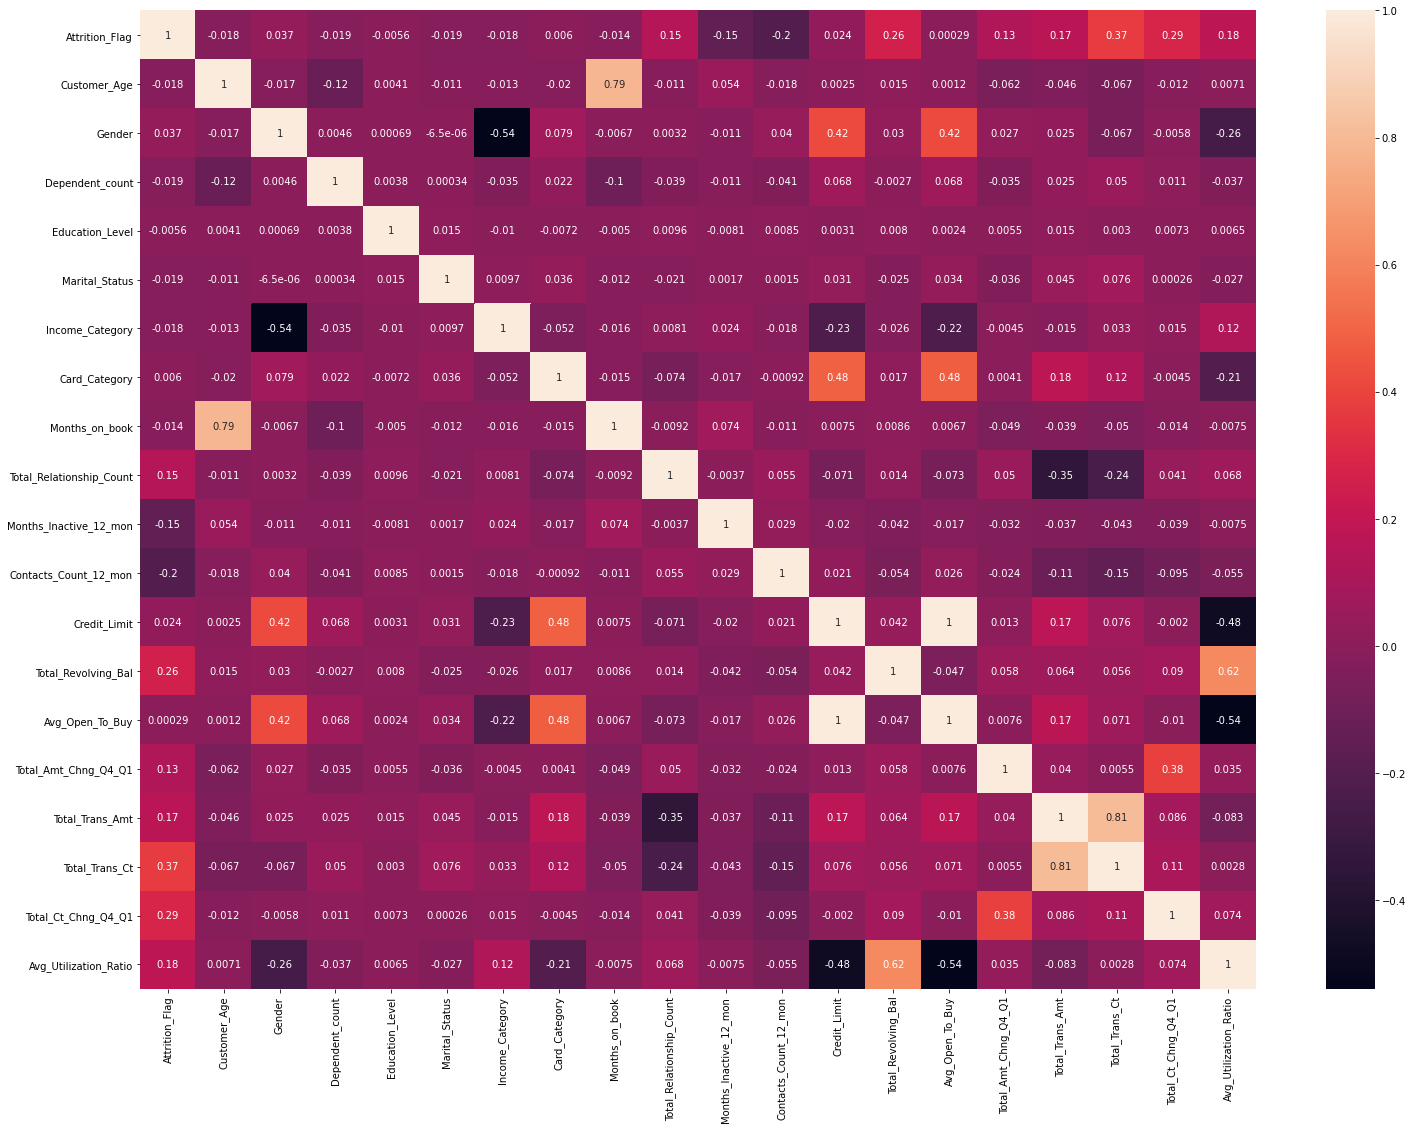

In [180]:
plt.figure(figsize=(25,18))
#Creating Pearson Correlation Heatmap
sns.heatmap(df.corr(),annot=True)

 Months_on_Book - Customer_Age 
 
 Total_Revolving_Balance - Avg_Utilization_Ratio
 
 are highly related. However, as we are going to use ensemble approaches, hence, high correlation does not matter much

In [181]:
#Creating another list of features
features=[]
for items in df:
    features.append(items) 
features

['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [182]:
def getFeatureImportance():
    from xgboost import XGBRegressor
    from matplotlib import pyplot
    # define the model
    X = df.iloc[:, 1:].values
    y = df.iloc[:,0].values
    model = XGBRegressor()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = model.feature_importances_

    # summarize feature importance
    for i,v in enumerate(importance):
        print(features[i] + ' -  %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

Attrition_Flag -  0, Score: 0.02253
Customer_Age -  1, Score: 0.01105
Gender -  2, Score: 0.00695
Dependent_count -  3, Score: 0.00640
Education_Level -  4, Score: 0.01436
Marital_Status -  5, Score: 0.00662
Income_Category -  6, Score: 0.00851
Card_Category -  7, Score: 0.01184
Months_on_book -  8, Score: 0.14197
Total_Relationship_Count -  9, Score: 0.04233
Months_Inactive_12_mon -  10, Score: 0.03575
Contacts_Count_12_mon -  11, Score: 0.01781
Credit_Limit -  12, Score: 0.21249
Total_Revolving_Bal -  13, Score: 0.02038
Avg_Open_To_Buy -  14, Score: 0.03433
Total_Amt_Chng_Q4_Q1 -  15, Score: 0.07954
Total_Trans_Amt -  16, Score: 0.24716
Total_Trans_Ct -  17, Score: 0.06813
Total_Ct_Chng_Q4_Q1 -  18, Score: 0.01186


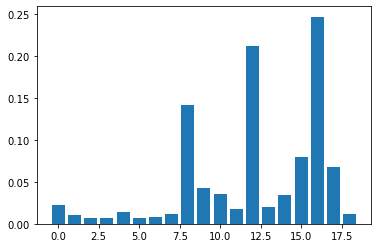

In [183]:
#Calling the function
getFeatureImportance()

We see the values of Dependent_count , Education_Level have less than 1/100th importance. Hence, we drop them as they do not contribute much but may lose accuracy.

In [184]:
df.drop('Dependent_count',axis=1)
df.drop('Education_Level',axis=1)

Attrition_Flag  Customer_Age  Gender  Dependent_count  Marital_Status  \
0                   1            45       1                3               1   
1                   1            49       0                5               2   
2                   1            51       1                3               1   
3                   1            40       0                4               3   
4                   1            40       1                3               1   
...               ...           ...     ...              ...             ...   
10122               1            50       1                2               2   
10123               0            41       1                2               0   
10124               0            44       0                1               1   
10125               0            30       1                2               3   
10126               0            43       0                2               1   

       Income_Category  Card_Category  Months_on_book  \
0                    2              0              39   
1                    4              0              44   
2                    3              0              36   
3                    4              0              34   
4                    2              0              21   
...                ...            ...             ...   
10122                1              0              40   
10123                1              0              25   
10124                4              0              36   
10125                1              0              36   
10126                4              3              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0               

In [185]:
#Defining the Final Model
X = df.iloc[:, 1:].values
y = df.iloc[:,0].values

In [186]:
#Splitting in Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [187]:
#Standardising the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Applying the scalar from X_train on X_test
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [188]:
#Importing the accuracy, F1, precision and recall libraries
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,precision_recall_fscore_support,recall_score

## Predicting Models using Ensemble Algorithms

##### Random Forest Classifier

In [189]:
def GetRFC():
    #Importing the algorithm library
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    #Fitting the model
    classifier.fit(X_train, y_train)
    #Predicting the models
    y_pred = classifier.predict(X_test)
    #Creating Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    accuracy_score(y_test, y_pred)
    print("\n")
    #The scoring parameters
    precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1,beta = 1)
    # classification_report for Attrited Customer  
    print(classification_report(y_test,y_pred))
    print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
    print("Recall: %.2f%%" % ((recall_score(y_test,y_pred))*100.0))

    print("\n")

##### Decision Tree Classifier

In [190]:
def GetDTC():
    #Importing the algorithm library
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    #Fitting the model
    classifier.fit(X_train, y_train)
    #Predicting the models
    y_pred = classifier.predict(X_test)
    
    #Creating Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))
    print("\n")
    #The scoring parameters
    precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1,beta = 1)
    # classification_report for Attrited Customer  
    print(classification_report(y_test,y_pred))
    print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
    print("Recall: %.2f%%" % ((recall_score(y_test,y_pred))*100.0))
    print("\n")

##### Support Vector Machine Classifier

In [191]:
def GetSVC():
    #Importing the algorithm library
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear', random_state = 0)
    #Fitting the model
    classifier.fit(X_train, y_train)
    #Predicting the models
    y_pred = classifier.predict(X_test)
    
    #Creating Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))
    print("\n")
    #The scoring parameters
    precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1,beta = 1)
    # classification_report for Attrited Customer  
    print(classification_report(y_test,y_pred))
    print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
    print("Recall: %.2f%%" % ((recall_score(y_test,y_pred))*100.0))
    print("\n")

#### Extreme Gradient Boosting

In [192]:
def GetXGB():
    #Importing the algorithm library
    from xgboost import XGBClassifier
    classifier = XGBClassifier(use_label_encoder=False,verbosity = 0)
    #Fitting the model
    classifier.fit(X_train, y_train)
    #Predicting the models
    y_pred = classifier.predict(X_test)
    
    #Creating Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))
    print("\n")
    #The scoring parameters
    precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1,beta = 1)
    # classification_report for Attrited Customer  
    print(classification_report(y_test,y_pred))
    print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
    print("Recall: %.2f%%" % ((recall_score(y_test,y_pred))*100.0))
    print("\n")

In [193]:
#Call the algorithms
print("_______ RFC _______ \n")
GetRFC()
print("_______ DTC _______ \n")
GetDTC()
print("_______ SVC _______ \n")
GetSVC()
print("_______ XGB _______ \n")
GetXGB()

_______ RFC _______ 

[[ 321   63]
 [  44 2104]]


              precision    recall  f1-score   support

           0       0.88      0.84      0.86       384
           1       0.97      0.98      0.98      2148

    accuracy                           0.96      2532
   macro avg       0.93      0.91      0.92      2532
weighted avg       0.96      0.96      0.96      2532

Accuracy: 95.77%
Recall: 97.95%


_______ DTC _______ 

[[ 305   79]
 [  71 2077]]
0.9407582938388626


              precision    recall  f1-score   support

           0       0.81      0.79      0.80       384
           1       0.96      0.97      0.97      2148

    accuracy                           0.94      2532
   macro avg       0.89      0.88      0.88      2532
weighted avg       0.94      0.94      0.94      2532

Accuracy: 94.08%
Recall: 96.69%


_______ SVC _______ 

[[ 221  163]
 [  76 2072]]
0.905608214849921


              precision    recall  f1-score   support

           0       0.74      0.58

The best algorithm for this model is shown by XGBoost - with an accuracy of 98.59%!

### Using SMOTE

A whopping 98% accuracy and 98% recall may occur due to the very small number of Attrited Customers. Hence, we try SMOTE and see what happens to the result.

SMOTE helps to balance the data.

In [194]:
#importing SMOTE Library from imblearn (!pip install imblearn) - An imbalance
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [195]:
#Redefining X and y after SMOTE
X,y=smote.fit_resample(X,y)

In [196]:
#Visiual of the data now
fig = px.pie(names=y,title='Attrition_Flag After SMOTE')
fig.show() 

Now the dataset is balanced

In [197]:
#Resplitting the data and Standardising the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [198]:
#Applying the algorithms
print("_______ RFC _______ \n")
GetRFC()
print("_______ DTC _______ \n")
GetDTC()
print("_______ SVC _______ \n")
GetSVC()
print("_______ XGB _______ \n")
GetXGB()

_______ RFC _______ 

[[2089   37]
 [  67 2057]]


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2126
           1       0.98      0.97      0.98      2124

    accuracy                           0.98      4250
   macro avg       0.98      0.98      0.98      4250
weighted avg       0.98      0.98      0.98      4250

Accuracy: 97.55%
Recall: 96.85%


_______ DTC _______ 

[[2048   78]
 [  77 2047]]
0.9635294117647059


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2126
           1       0.96      0.96      0.96      2124

    accuracy                           0.96      4250
   macro avg       0.96      0.96      0.96      4250
weighted avg       0.96      0.96      0.96      4250

Accuracy: 96.35%
Recall: 96.37%


_______ SVC _______ 

[[1836  290]
 [ 362 1762]]
0.8465882352941176


              precision    recall  f1-score   support

           0       0.84      0.8

XGBoost worked even better with SMOTE! Hence, we are going to use XGBoost as our main algorithm now.

##### K-Cross Validation

In [199]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
classifier = XGBClassifier(use_label_encoder=False,verbosity = 0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.42 %
Standard Deviation: 0.25 %


Hence, we can get a maximum accuracy of 98.41+0.33 = 98.74%

So what should the bank do?

-> Eliminate Silver Card or make changes to make it popular 

-> Look at the Transaction Amount to understand who attritis

-> Seemingly constant ratio can help analyse the results with different features

-> Use XGBoost to make better predictions that are almost certain.

---------------------------------------------------------